In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

In [2]:
path_figure = os.path.join('svg', 'figureS19_sm_predicted_task_switching.svg')
path_colorbar = os.path.join('svg', 'figureS19_colorbar.svg')  # For plotting the colorbar

In [3]:
parity =    np.array([[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]])
value =     np.array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]])
prime =     np.array([[0, 0, 1, 1, 0, 1, 0, 1, 0, 0]])
fibonacci = np.array([[1, 1, 1, 1, 0, 1, 0, 0, 1, 0]])
mul3 =      np.array([[0, 0, 0, 1, 0, 0, 1, 0, 0, 1]])

vowel =        np.array([[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
position =     np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [4]:
def compute_sm_task_switching(tasks):
    assert len(tasks) == 2

    similarity_matrix = tasks[0].T @ tasks[1] + (1 - tasks[0]).T @ (1 - tasks[1])

    return similarity_matrix

In [5]:
def calculate_predicted_block_average(tasks):
    task1, task2 = tasks
    C = task1.shape[1] * task2.shape[1]

    values_1 = (task1 @ task1.T @ task2 @ task2.T)
    values_0 = ((1 - task1) @ (1 - task1.T)) @ ((1 - task2) @ (1 - task2).T)

    predicted_average = (values_1 + values_0) / C

    return predicted_average.item()

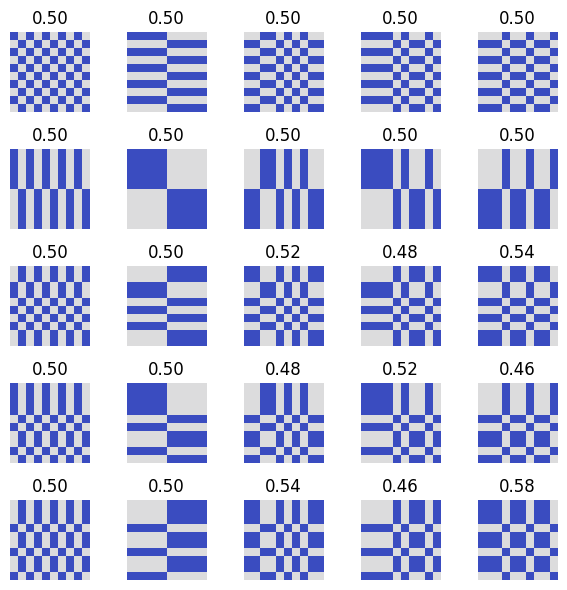

In [6]:
tasks = [parity, value, prime, fibonacci, mul3]
num_tasks = len(tasks)

fig, ax = plt.subplots(num_tasks, num_tasks, figsize=(6, 6))

for i_task, task1 in enumerate(tasks):
    for j_task, task2 in enumerate(tasks):
        sm = compute_sm_task_switching([task1, task2])
        ax[i_task, j_task].imshow(sm, cmap='coolwarm_r', vmin=-1, vmax=1)
        ax[i_task, j_task].set_title(f'{sm.mean():.2f}')
        ax[i_task, j_task].axis('off')

        assert sm.mean() == calculate_predicted_block_average([task1, task2])

fig.tight_layout()
fig.savefig(path_figure)
plt.show()

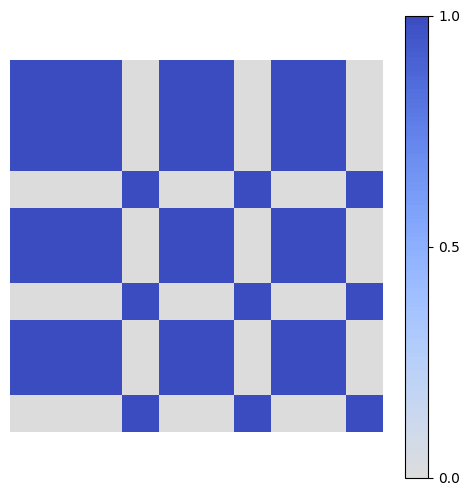

In [7]:
fig = plt.figure(figsize=(6, 6))
plt.imshow(sm, cmap='coolwarm_r', vmin=-1, vmax=1)
plt.axis('off')
plt.colorbar(boundaries=np.linspace(0, 1, 101), ticks=(0, 0.5, 1))
fig.savefig(path_colorbar)
plt.show()

In [8]:
calculate_predicted_block_average([prime, fibonacci])

0.48